In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from collections import Counter
import matplotlib.patches as mpatches
sns.set_style("white")


In [2]:
plt.rcParams["axes.labelsize"] = 16.
plt.rcParams["xtick.labelsize"] = 14.
plt.rcParams["ytick.labelsize"] = 14.
plt.rcParams["legend.fontsize"] = 12.
plt.rcParams["figure.figsize"] = [15., 6.]

In [3]:
battles=pd.read_csv('battles.csv')
character_prediction=pd.read_csv('character-predictions.csv')
character_deaths=pd.read_csv('character-deaths.csv')

In [4]:
#define additional columns related to defender count, attacker count, commander on attacking side, no of books a character appeared in

#battles.loc[:,'defender_count']
#list=[x for x in [battles[['defender_1','defender_2','defender_3','defender_4']]]]


#[x for x in battles[['defender_1','defender_2','defender_3','defender_4']]]
#battles[['defender_1','defender_2','defender_3','defender_4']]
battles.loc[:,'defender_count']=4-battles[['defender_1','defender_2','defender_3','defender_4']].isnull().sum(axis=1)
battles.loc[:,'attacker_count']=4-battles[['attacker_1','attacker_2','attacker_3','attacker_4']].isnull().sum(axis=1)
#battles.loc[:,'att_comm_count']=4-battles[['defender_1','defender_2','defender_3','defender_4']].isnull().sum(axis=1)
battles.loc[:,'att_comm_count']=[len(x.split(',')) if pd.isnull(x)!=True else np.nan for x in battles['attacker_commander']]

In [5]:
# number of commanders on attacking side
#[type(x) for x in battles['att_comm_count']]
#[type(len(x.split(','))) if pd.isnull(x)!=True else np.nan for x in battles['attacker_commander']]


In [6]:
character_prediction.loc[:,'no_of_books']=character_prediction[['book1', 'book2', 'book3', 'book4', 'book5']].sum(axis=1)

In [7]:
battles[['year','major_capture']].groupby('year').size()

year
298     7
299    20
300    11
dtype: int64

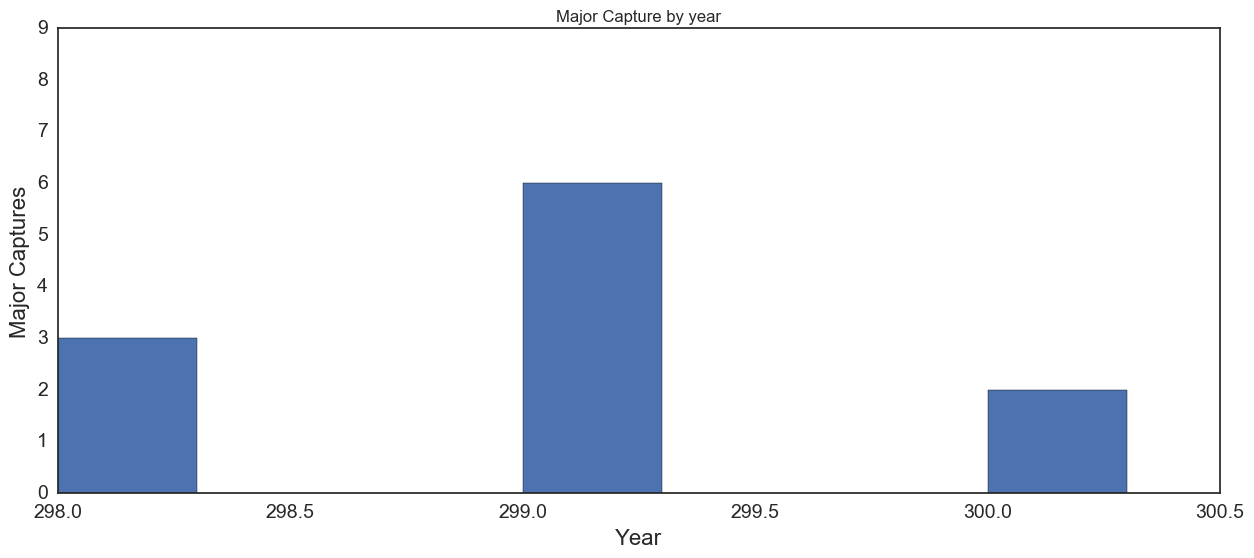

In [8]:
#battles[['year','major_capture']].groupby('year').size()
mc=battles[['year','major_capture']].groupby('year').sum().values
year=battles['year'].unique()
plt.bar(year,mc,width=0.3)
plt.ylim(0,9)
plt.xlabel('Year')
plt.ylabel('Major Captures')
plt.title('Major Capture by year')
plt.show()

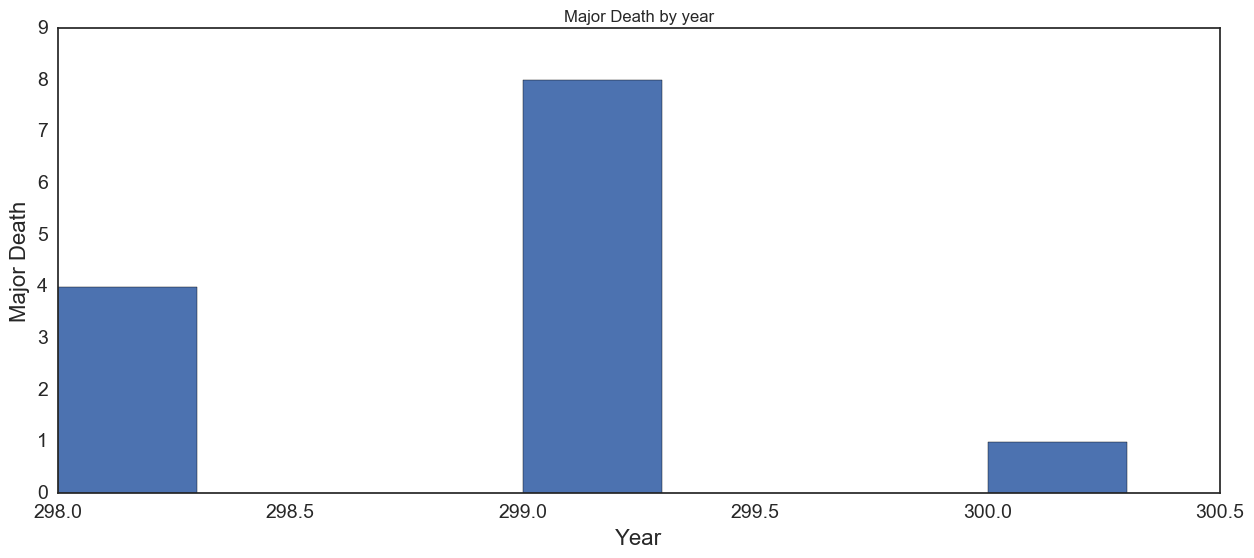

In [9]:
mc=battles[['year','major_death']].groupby('year').sum().values
year=battles['year'].unique()
plt.bar(year,mc,width=0.3)
plt.xlabel('Year')
plt.ylim(0,9)
plt.ylabel('Major Death')
plt.title('Major Death by year')
plt.show()

In [10]:
battles[['attacker_size','defender_size','attacker_outcome']].head()

,attacker_size,defender_size,attacker_outcome
0,15000.0,4000.0,win
1,NaN,120.0,win
2,15000.0,10000.0,win
3,18000.0,20000.0,loss
4,1875.0,6000.0,win


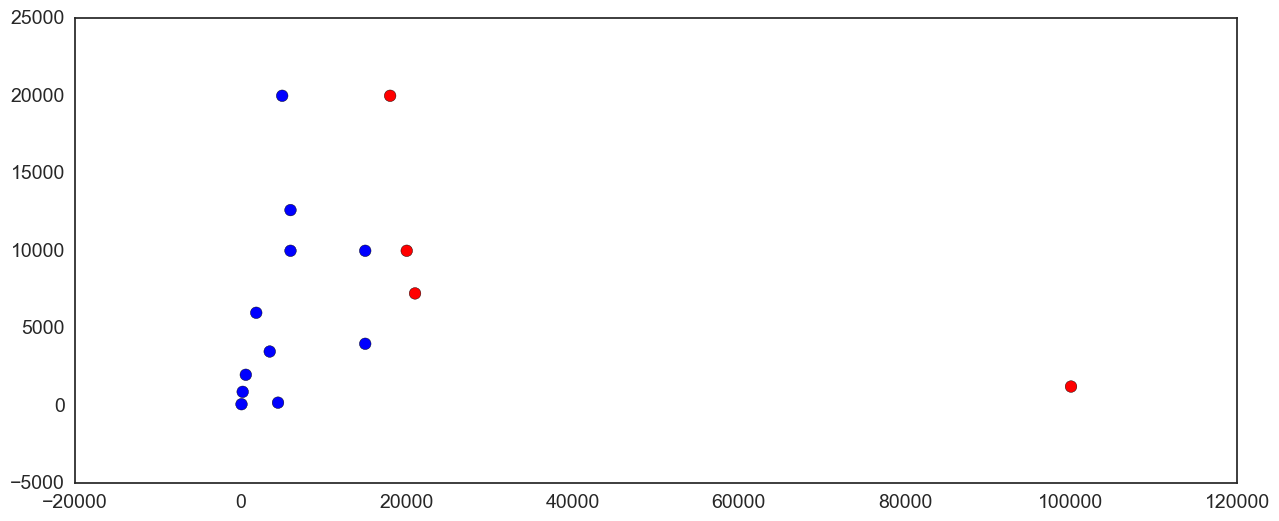

In [11]:
df=battles[['attacker_size','defender_size','attacker_outcome']].dropna()
colors=['b' if x=='win' else 'r' for x in df['attacker_outcome']]
plt.scatter(df['attacker_size'], df['defender_size'],s=70,c=colors)
plt.show()

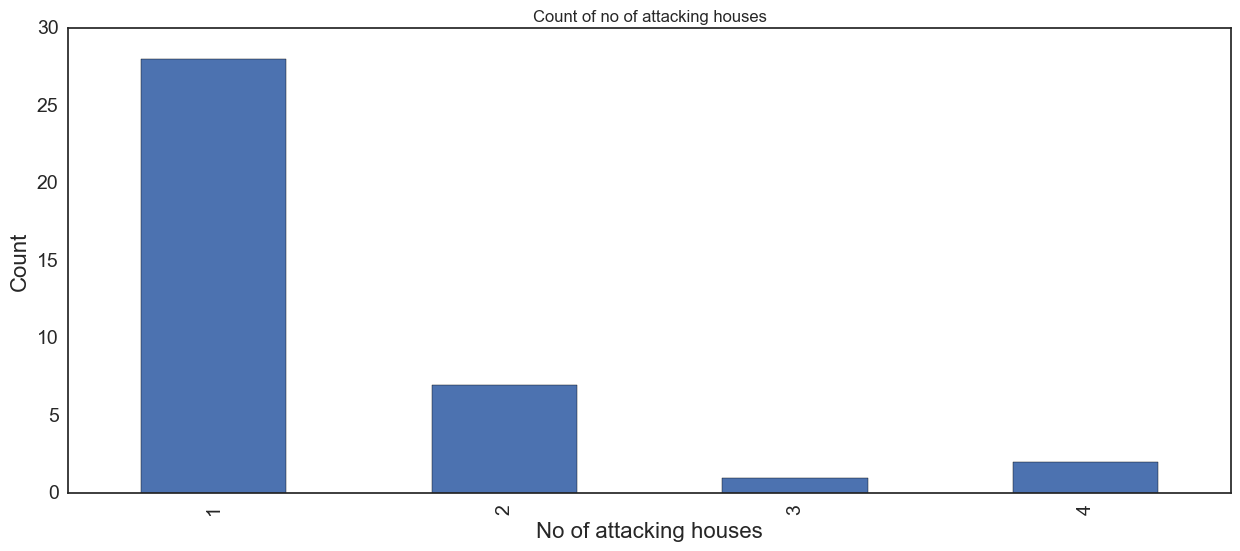

In [12]:
battles['attacker_count'].value_counts().sort_index().plot.bar()
plt.xlabel('No of attacking houses')
plt.ylabel('Count')
plt.title('Count of no of attacking houses')
plt.show()

In [13]:
battles[['attacker_1','attacker_2','attacker_3','attacker_4','defender_1','defender_2','defender_3','defender_4']].isnull().sum(axis=1)

0     6
1     6
2     6
3     6
4     5
5     5
6     6
7     6
8     6
9     6
10    6
11    6
12    6
13    5
14    5
15    6
16    6
17    6
18    6
19    6
20    6
21    6
22    6
23    6
24    6
25    5
26    6
27    3
28    6
29    7
30    3
31    6
32    6
33    6
34    6
35    5
36    5
37    2
dtype: int64

In [14]:
battles[['attacker_king','defender_king']].dropna().shape

(35, 2)

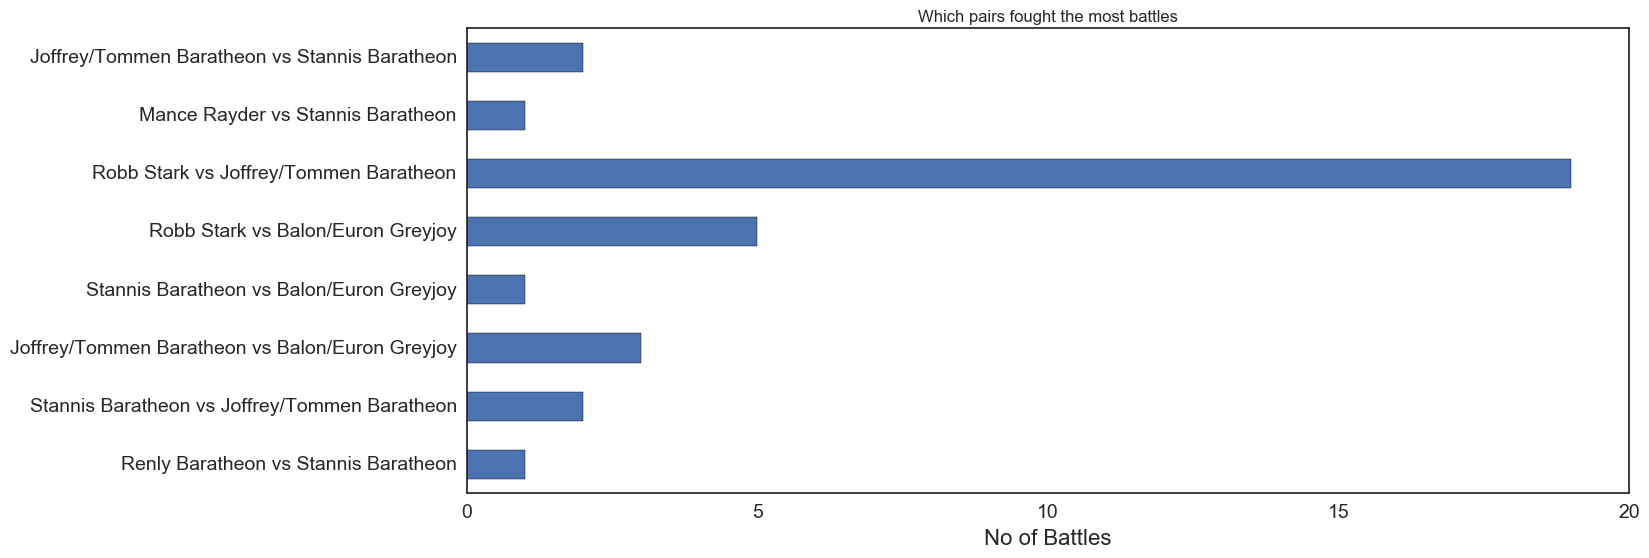

In [15]:
l=list(Counter([tuple(set(x)) for x in battles[['attacker_king','defender_king']].dropna().values if(len(set(x))>1) ]).items())
p=pd.DataFrame(l).plot.barh()
p.set(yticklabels=["%s vs %s"%(x[0],x[1])  for x in list(zip(*l))[0]  ])
plt.xlabel('No of Battles')
plt.title('Which pairs fought the most battles')
plt.legend().remove()
plt.show()

In [16]:
list(Counter([tuple(set(x)) for x in battles[['attacker_king','defender_king']].dropna().values if(len(set(x))>1)]).items())

[(('Renly Baratheon', 'Stannis Baratheon'), 1),
 (('Stannis Baratheon', 'Joffrey/Tommen Baratheon'), 2),
 (('Joffrey/Tommen Baratheon', 'Balon/Euron Greyjoy'), 3),
 (('Stannis Baratheon', 'Balon/Euron Greyjoy'), 1),
 (('Robb Stark', 'Balon/Euron Greyjoy'), 5),
 (('Robb Stark', 'Joffrey/Tommen Baratheon'), 19),
 (('Mance Rayder', 'Stannis Baratheon'), 1),
 (('Joffrey/Tommen Baratheon', 'Stannis Baratheon'), 2)]

In [17]:
list(zip(*l))[0]

(('Renly Baratheon', 'Stannis Baratheon'),
 ('Stannis Baratheon', 'Joffrey/Tommen Baratheon'),
 ('Joffrey/Tommen Baratheon', 'Balon/Euron Greyjoy'),
 ('Stannis Baratheon', 'Balon/Euron Greyjoy'),
 ('Robb Stark', 'Balon/Euron Greyjoy'),
 ('Robb Stark', 'Joffrey/Tommen Baratheon'),
 ('Mance Rayder', 'Stannis Baratheon'),
 ('Joffrey/Tommen Baratheon', 'Stannis Baratheon'))

In [18]:
["%s vs %s"%(x[0],x[1])  for x in list(zip(*l))[0]  ]

['Renly Baratheon vs Stannis Baratheon',
 'Stannis Baratheon vs Joffrey/Tommen Baratheon',
 'Joffrey/Tommen Baratheon vs Balon/Euron Greyjoy',
 'Stannis Baratheon vs Balon/Euron Greyjoy',
 'Robb Stark vs Balon/Euron Greyjoy',
 'Robb Stark vs Joffrey/Tommen Baratheon',
 'Mance Rayder vs Stannis Baratheon',
 'Joffrey/Tommen Baratheon vs Stannis Baratheon']

In [19]:
attacker_comm=battles[['attacker_king','attacker_commander']].dropna().groupby(['attacker_king'])['attacker_commander'].transform(lambda x: ','.join(set(x)))
[pd.DataFrame(attacker_comm).drop_duplicates().reset_index()]
#print(battles[['defender_king','defender_commander']].dropna().groupby('defender_king').sum())

[   index                                 attacker_commander
 0      0  Mace Tyrell, Mathis Rowan,Ramsay Snow, Theon G...
 1      3  Helman Tallhart,Rodrik Cassel, Cley Cerwyn,Rob...
 2      7  Victarion Greyjoy,Euron Greyjoy, Victarion Gre...
 3     15  Stannis Baratheon, Alysane Mormot,Mance Rayder...]

In [20]:
battles.keys()

Index(['name', 'year', 'battle_number', 'attacker_king', 'defender_king',
       'attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1',
       'defender_2', 'defender_3', 'defender_4', 'attacker_outcome',
       'battle_type', 'major_death', 'major_capture', 'attacker_size',
       'defender_size', 'attacker_commander', 'defender_commander', 'summer',
       'location', 'region', 'note', 'defender_count', 'attacker_count',
       'att_comm_count'],
      dtype='object')

In [21]:
battles[['attacker_king','attacker_commander']].dropna().groupby('attacker_king').sum().reset_index()

,attacker_king,attacker_commander
0,Balon/Euron Greyjoy,Victarion GreyjoyAsha GreyjoyTheon GreyjoyTheo...
1,Joffrey/Tommen Baratheon,"Jaime LannisterGregor CleganeJaime Lannister, ..."
2,Robb Stark,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H..."
3,Stannis Baratheon,"Stannis Baratheon, Davos SeaworthStannis Barat..."


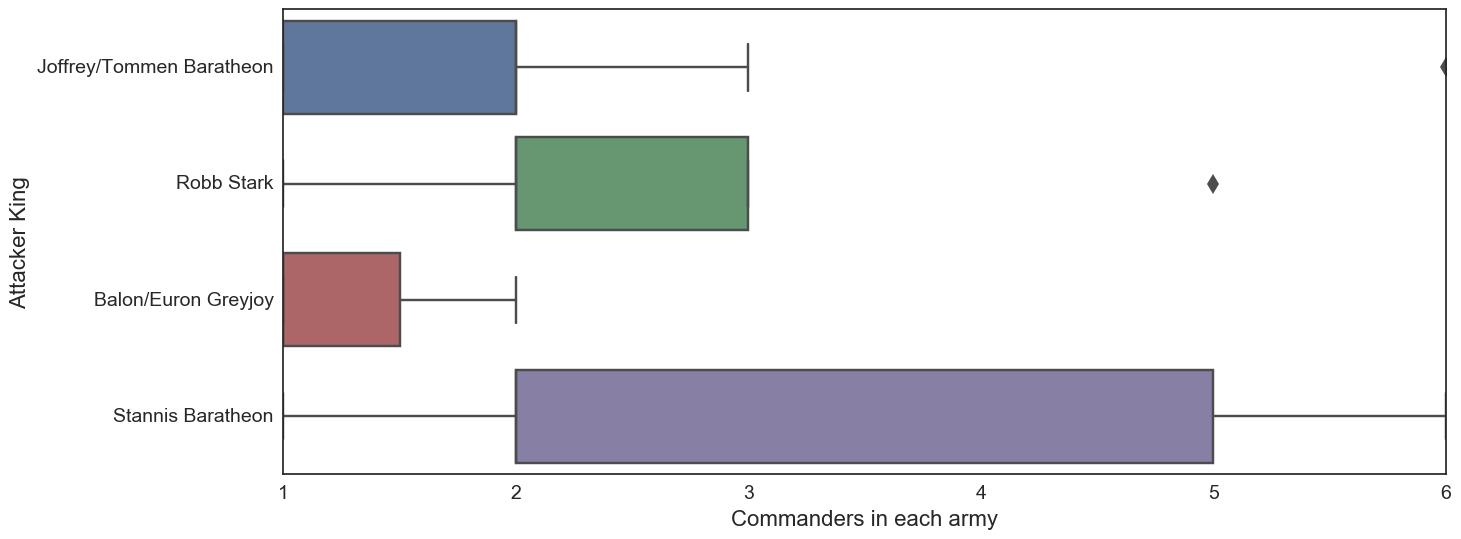

In [38]:
sns.boxplot("att_comm_count","attacker_king",data=battles,saturation=.6,fliersize=10.)
plt.xlabel('Commanders in each army')
plt.ylabel('Attacker King')
plt.xticks=range(8)
plt.show()

In [54]:
battles[['attacker_commander','attacker_king']].groupby('attacker_king').sum() 

,attacker_commander
attacker_king,
Balon/Euron Greyjoy,Victarion GreyjoyAsha GreyjoyTheon GreyjoyTheo...
Joffrey/Tommen Baratheon,"Jaime LannisterGregor CleganeJaime Lannister, ..."
Robb Stark,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H..."
Stannis Baratheon,"Stannis Baratheon, Davos SeaworthStannis Barat..."


In [53]:
[x for x in battles['attacker_commander'].dropna().str.split(',').sum()]

['Jaime Lannister',
 'Gregor Clegane',
 'Jaime Lannister',
 ' Andros Brax',
 'Roose Bolton',
 ' Wylis Manderly',
 ' Medger Cerwyn',
 ' Harrion Karstark',
 ' Halys Hornwood',
 'Robb Stark',
 ' Brynden Tully',
 'Robb Stark',
 ' Tytos Blackwood',
 ' Brynden Tully',
 'Gregor Clegane',
 'Victarion Greyjoy',
 'Asha Greyjoy',
 'Theon Greyjoy',
 'Rodrik Cassel',
 ' Cley Cerwyn',
 'Theon Greyjoy',
 'Dagmer Cleftjaw',
 'Ramsay Snow',
 ' Theon Greyjoy ',
 'Robb Stark',
 ' Brynden Tully',
 'Stannis Baratheon',
 ' Davos Seaworth',
 'Tywin Lannister',
 ' Flement Brax',
 ' Gregor Clegane',
 ' Addam Marbrand',
 ' Lyle Crakehall',
 ' Leo Lefford',
 'Roose Bolton',
 ' Vargo Hoat',
 ' Robett Glover',
 'Robb Stark',
 ' Smalljon Umber',
 ' Black Walder Frey',
 'Stannis Baratheon',
 ' Imry Florent',
 ' Guyard Morrigen',
 ' Rolland Storm',
 ' Salladhor Saan',
 ' Davos Seaworth',
 'Helman Tallhart',
 'Robertt Glover',
 ' Helman Tallhart',
 'Gregor Clegane',
 'Gregor Clegane',
 'Walder Frey',
 ' Roose Bolton',

In [52]:
commanders=battles[['attacker_commander','attacker_king']].groupby('attacker_king').sum()

In [57]:
battles.groupby('attacker_king')['attacker_commander'].apply(','.join)

attacker_king
Balon/Euron Greyjoy         Victarion Greyjoy,Asha Greyjoy,Theon Greyjoy,T...
Joffrey/Tommen Baratheon    Jaime Lannister,Gregor Clegane,Jaime Lannister...
Robb Stark                  Roose Bolton, Wylis Manderly, Medger Cerwyn, H...
Stannis Baratheon           Stannis Baratheon, Davos Seaworth,Stannis Bara...
Name: attacker_commander, dtype: object

In [50]:
battles[['attacker_king','attacker_commander']]

,attacker_king,attacker_commander
0,Joffrey/Tommen Baratheon,Jaime Lannister
1,Joffrey/Tommen Baratheon,Gregor Clegane
2,Joffrey/Tommen Baratheon,"Jaime Lannister, Andros Brax"
3,Robb Stark,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H..."
4,Robb Stark,"Robb Stark, Brynden Tully"
5,Robb Stark,"Robb Stark, Tytos Blackwood, Brynden Tully"
6,Joffrey/Tommen Baratheon,Gregor Clegane
7,Balon/Euron Greyjoy,Victarion Greyjoy
8,Balon/Euron Greyjoy,Asha Greyjoy
9,Balon/Euron Greyjoy,Theon Greyjoy


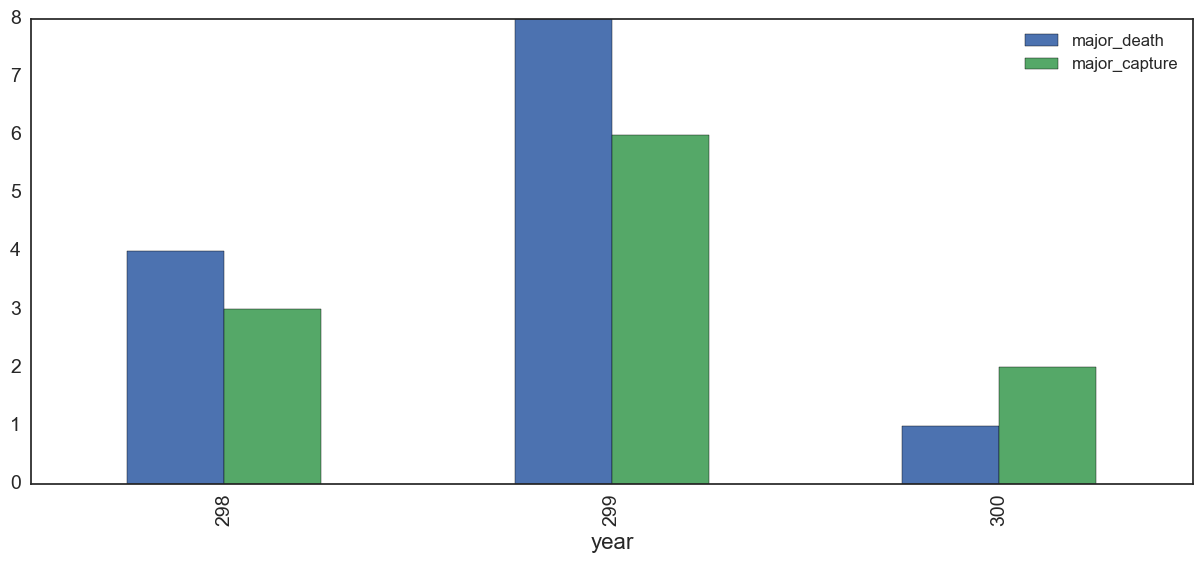

In [66]:
battles[['major_death','major_capture','year']].groupby('year').sum().plot.bar()
plt.show()

In [67]:
battles.keys()


Index(['name', 'year', 'battle_number', 'attacker_king', 'defender_king',
       'attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1',
       'defender_2', 'defender_3', 'defender_4', 'attacker_outcome',
       'battle_type', 'major_death', 'major_capture', 'attacker_size',
       'defender_size', 'attacker_commander', 'defender_commander', 'summer',
       'location', 'region', 'note', 'defender_count', 'attacker_count',
       'att_comm_count'],
      dtype='object')

In [69]:
battles[['battle_number','location','region']]

,battle_number,location,region
0,1,Golden Tooth,The Westerlands
1,2,Mummer's Ford,The Riverlands
2,3,Riverrun,The Riverlands
3,4,Green Fork,The Riverlands
4,5,Whispering Wood,The Riverlands
5,6,Riverrun,The Riverlands
6,7,Darry,The Riverlands
7,8,Moat Cailin,The North
8,9,Deepwood Motte,The North
9,10,Stony Shore,The North


In [88]:
battles.groupby('region')['location'].apply(lambda x: len(list(set(','.join(x.dropna()).split(',')))))

region
Beyond the Wall     1
The Crownlands      2
The North           5
The Reach           4
The Riverlands     12
The Stormlands      2
The Westerlands     3
Name: location, dtype: int64